In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("car.data", header = None)

In [10]:
data.columns =["Price", "Maintenance Cost", "Number of Doors", "Capacity", "Size of Luggage Boot", "Safety", "Decision"]

In [14]:
data.head(5)

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,Safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [16]:
data.sample(5)

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,Safety,Decision
320,vhigh,med,5more,more,med,high,acc
1179,med,med,5more,more,small,low,unacc
1052,med,high,4,more,big,high,acc
1519,low,med,2,2,big,med,unacc
1725,low,low,5more,more,big,low,unacc


In [17]:
data.tail(5)

,Price,Maintenance Cost,Number of Doors,Capacity,Size of Luggage Boot,Safety,Decision
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [18]:
data.shape

(1728, 7)

In [19]:
data.size

12096

In [22]:
data["Price"].sample(5)

1110     med
1400     low
806     high
928      med
1245     med
Name: Price, dtype: object

In [24]:
data["Price"][:5]

0    vhigh
1    vhigh
2    vhigh
3    vhigh
4    vhigh
Name: Price, dtype: object

In [25]:
data[ ["Price", "Safety", "Decision"] ].tail(5)

,Price,Safety,Decision
1723,low,med,good
1724,low,high,vgood
1725,low,low,unacc
1726,low,med,good
1727,low,high,vgood


In [28]:
decision = data["Decision"].value_counts()
print(decision)

unacc    1210
acc       384
good       69
vgood      65
Name: Decision, dtype: int64


In [27]:
data["Decision"].value_counts().sort_index(ascending = False)

vgood      65
unacc    1210
good       69
acc       384
Name: Decision, dtype: int64

<AxesSubplot:title={'center':'Counts type of decisions'}, xlabel='Class Values', ylabel='Counts'>

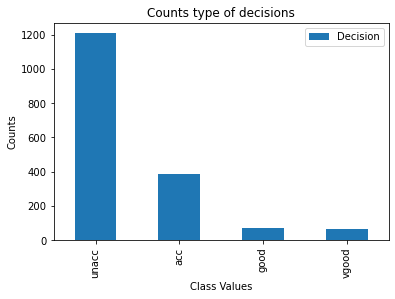

In [43]:
decision.plot(kind = "bar", xlabel = "Class Values", ylabel = "Counts", legend = True, title="Counts type of decisions")

In [44]:
data["Price"].unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [45]:
data["Price"].replace(('vhigh', 'high', 'med', 'low'), (4, 3, 2, 1), inplace = True)

In [46]:
data["Price"].unique()

array([4, 3, 2, 1], dtype=int64)

In [47]:
price = data["Price"].value_counts()

Text(0.5, 1.0, 'Cars prices')

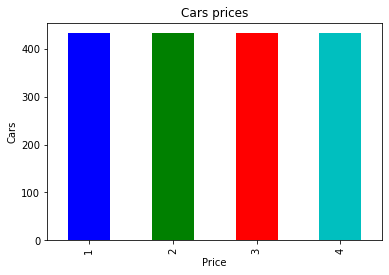

In [51]:
colors = [ 'b', 'g', 'r', 'c' ]
price.plot(kind = "bar", color = colors)
plt.xlabel("Price")
plt.ylabel("Cars")
plt.title("Cars prices")

In [52]:
data["Safety"].unique()

array(['low', 'med', 'high'], dtype=object)

In [54]:
data["Safety"].value_counts()

low     576
high    576
med     576
Name: Safety, dtype: int64

In [59]:
labels = ["Low", " Medium", "High"]
size = [576, 576, 576]
colors =["cyan", "gray", "orange"]
explode = [0.1, 0, 0]

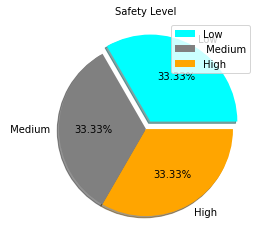

In [60]:
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title("Safety Level", fontsize = 10)
plt.axis("off")
plt.legend(loc = "best")
plt.show()

# Arbol de decision


In [61]:
data.columns = ["price", "maintenance", "n_doors", "capacity", "size_lug", "safety", "class"]

In [62]:
data.sample(10)

,price,maintenance,n_doors,capacity,size_lug,safety,class
610,3,high,4,4,big,med,acc
980,2,high,2,2,big,high,unacc
667,3,med,2,more,small,med,unacc
1438,1,high,3,2,big,med,unacc
211,4,high,5more,more,med,med,unacc
328,4,low,2,2,med,med,unacc
1389,1,vhigh,5more,4,med,low,unacc
496,3,vhigh,4,4,small,med,unacc
12,4,vhigh,2,4,med,low,unacc
59,4,vhigh,4,2,med,high,unacc


In [63]:
data.price.replace(("vhigh", "high", "med", "low"), (4, 3, 2, 1), inplace = True)
data.maintenance.replace(("vhigh", "high", "med", "low"), (4, 3, 2, 1), inplace = True)
data.n_doors.replace(("2", "3", "4", "5more"), (1, 2, 3, 4), inplace = True)
data.capacity.replace(("2", "4", "more"), (1, 2, 3), inplace = True)
data.size_lug.replace(("small", "med", "big"), (1, 2, 3), inplace = True)
data.safety.replace(("low", "med", "high"), (1, 2, 3), inplace = True)


In [64]:
data["class"].replace(("unacc", "acc", "good", "vgood"), (1, 2, 3, 4), inplace = True)

In [65]:
data.head(5)

,price,maintenance,n_doors,capacity,size_lug,safety,class
0,4,4,1,1,1,1,1
1,4,4,1,1,1,2,1
2,4,4,1,1,1,3,1
3,4,4,1,1,2,1,1
4,4,4,1,1,2,2,1


In [68]:
import numpy as np


In [98]:
dataset = data.values
X = dataset[:, 0:6]
Y = np.asarray(dataset[:,6], dtype = "S6")

In [99]:
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [104]:
 X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [109]:
tr = tree.DecisionTreeClassifier(max_depth = 10)

In [117]:
tr.fit(X_Train, Y_Train)

DecisionTreeClassifier(max_depth=10)

In [118]:
y_pred = tr.predict(X_Test)

In [119]:
y_pred

array([b'2', b'1', b'1', b'1', b'1', b'3', b'1', b'2', b'3', b'1', b'1',
       b'1', b'2', b'1', b'1', b'2', b'1', b'1', b'2', b'1', b'3', b'2',
       b'3', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'3', b'2', b'1',
       b'2', b'3', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1',
       b'4', b'1', b'1', b'2', b'1', b'1', b'1', b'1', b'1', b'1', b'1',
       b'1', b'1', b'1', b'1', b'1', b'2', b'1', b'1', b'1', b'1', b'2',
       b'1', b'1', b'1', b'1', b'1', b'2', b'1', b'2', b'3', b'2', b'1',
       b'2', b'2', b'1', b'2', b'2', b'1', b'1', b'1', b'1', b'1', b'3',
       b'1', b'1', b'1', b'2', b'1', b'1', b'1', b'4', b'1', b'2', b'2',
       b'1', b'1', b'1', b'2', b'1', b'4', b'2', b'1', b'2', b'1', b'1',
       b'1', b'1', b'1', b'2', b'1', b'3', b'1', b'1', b'1', b'1', b'1',
       b'1', b'2', b'1', b'1', b'1', b'1', b'2', b'3', b'1', b'1', b'1',
       b'2', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1', b'1',
       b'2', b'1', b'1', b'2', b'1', b'2', b'2', b'

In [120]:
score = tr.score(X_Test, Y_Test)
print("Precisión: %0.4f" % (score))

Precisión: 0.9682
